1) A little introductory brain teaser. Which is more probable when rolling 2 six-sided dice: rolling snake eyes (two ones) or rolling sevens (dice sum to seven)? What is the ratio of the probabilities?

probability of (two ones) = 1/36

as the total number of outcomes is 36 and only one way you can get two ones.

probability of sum of 7 = 6/36 = 1/6

as the total number of outcomes is 36 and 6 ways to get 7

2) Following what we did in class show how to use the convolution operator to determine the probability of the sum of 2 six sided dice. Do both analytically (math & counting) and numerically (computer program). Beware the implicit definition of the values (x-axis on histogram).

total number of combinations = 36
sum of 2: (1,1) 1 possible combination = 1/36 = 0.027777778

sum of 3: (1,2) (2,1)= 2/36 = 0.5555556

sum of 4: (2,2) (1,3) (3,1) = 3/36 = 0.08333333

sum of 5: (4,1) (3,2) (2,3) (1,4) = 4/36 = 0.11111111

sum of 6: (5,1) (4,2) (3,3) (2,4) (1,5) = 5/36 =  0.13888889

sum of 7: (6,1) (5,2) (3,4) (4,3) (2,5) (1,6) = 6/36 = 0.16666667

sum of 8: (6,2) (5,3) (4,4) (3,5) (2,6) = 5/36 =  0.13888889

sum of 9: (3,6) (4,5) (5,4) (6,3) = 4/36 = 0.11111111

sum of 10: (4,6) (5,5) (6,4) = 3/36 = 0.08333333

sum of 11: (5,6) (6,5) = 2/36 = 0.05555556

sum of 12: (6,6) = 1/36 = 0.02777778

In [2]:
import numpy as np
v1 = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])
v2 = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])
np.convolve(v1, v2)

array([0.02777778, 0.05555556, 0.08333333, 0.11111111, 0.13888889,
       0.16666667, 0.13888889, 0.11111111, 0.08333333, 0.05555556,
       0.02777778])

3) Calculate the mean and the variance of the distribution in problem 2. Hint: this is surprisingly tricky, make sure your result makes sense.

mean:

In [3]:
x = np.array([2,3,4,5,6,7,8,9,10,11,12])
counts = np.array([0.02777778, 0.05555556, 0.08333333, 0.11111111, 0.13888889,
       0.16666667, 0.13888889, 0.11111111, 0.08333333, 0.05555556,
       0.02777778])
np.sum(x*counts) / np.sum(counts)

7.0

variance

In [6]:
np.sum(36 * counts *( (x-7.0) * (x - 7.0)))/36

5.83333352

4) Repeat 2, and graph the average of 10 dice. Is this is a Gaussian distribution? Explain in depth.

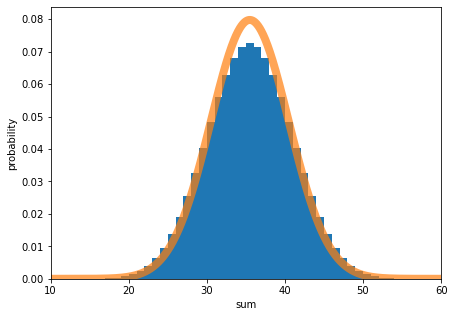

In [99]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
v1 = np.array([0,1/6, 1/6, 1/6, 1/6, 1/6, 1/6])
v2 = np.array([0,1/6, 1/6, 1/6, 1/6, 1/6, 1/6])
for x in range(9) :
    v2 = np.convolve(v1, v2)
    
v2    
plt.rcParams["figure.figsize"] = (7,5)
fig, ax = plt.subplots(1, 1, sharex = True, sharey = True)
ax.stairs(v2,fill = True)
ax.set_xlim(10,60)
ax.set_xlabel("sum")
ax.set_ylabel("probability")
ax.plot(np.linspace(10,60,1000),stats.norm.pdf(np.linspace(10,60,1000),loc = 35.5, scale = 5),linewidth = 8,alpha = 0.7)
plt.show()

on the log(y) scale

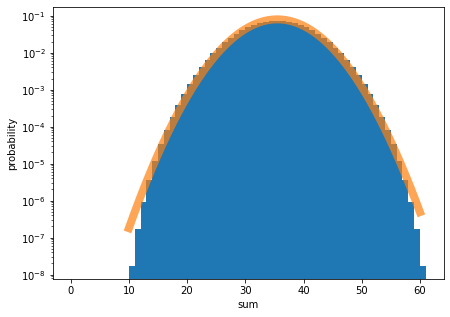

In [27]:
plt.rcParams["figure.figsize"] = (7,5)
fig, ax = plt.subplots(1, 1, sharex = True, sharey = True)
ax.stairs(v2,fill = True)
#ax.set_xlim(10,60)
ax.set_xlabel("sum")
ax.set_ylabel("probability")
ax.plot(np.linspace(10,60,1000),stats.norm.pdf(np.linspace(10,60,1000),loc = 35.5, scale = 5),linewidth = 8,alpha = 0.7)
ax.set_yscale("log")
plt.show()

The graph of the distribution for both the log of y value and the y value closely matches the gaussian distribution however, the values for this distribution are discrete and we need to take the data for indefinite dices for the graph to actually be gaussian.

5) Show that the sum and average of an initially Gaussian distribution is also a Guassian (can be analytic or numerical). How does the standard deviation of the resulting sum or average Guassian change? This is a hugely important result. Explore what this means for integrating a signal over time.

In [63]:
v_1 = stats.norm.pdf(np.linspace(10,60,1000),loc = 35.5, scale = 5)
v_2 =  stats.norm.pdf(np.linspace(0,9,1000),loc = 4.5, scale = 1)


np.convolve(v_1, v_2)/2

array([1.43413081e-12, 3.00257537e-12, 4.71452605e-12, ...,
       1.27896177e-11, 8.15364136e-12, 3.89837171e-12])

sums:

In [88]:
s = np.convolve(v_1, v_2)

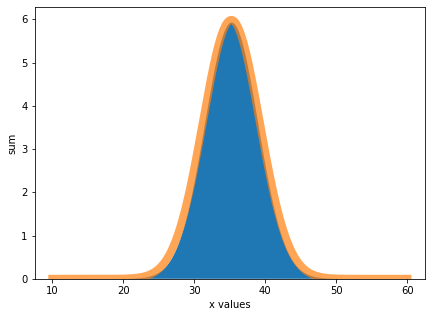

In [89]:
plt.rcParams["figure.figsize"] = (7,5)
fig, ax = plt.subplots(1, 1, sharex = True, sharey = True)
ax.stairs(s,np.linspace(10,60,2000),fill = True)
#ax.set_xlim(10,60)
ax.set_xlabel("x values")
ax.set_ylabel("sum")
max(s)
ax.plot(np.linspace(10,60,2000),60 * stats.norm.pdf(np.linspace(10,60,2000),35.2, scale = 4),linewidth = 8,alpha = 0.7)
#ax.set_yscale("log")
plt.show()

on the log y axis

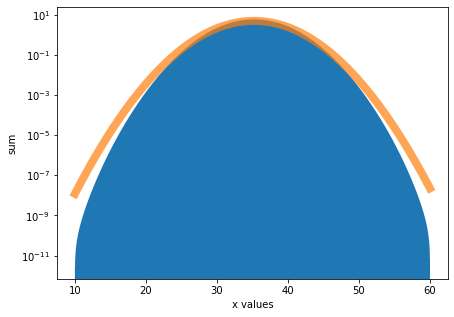

In [100]:
plt.rcParams["figure.figsize"] = (7,5)
fig, ax = plt.subplots(1, 1, sharex = True, sharey = True)
ax.stairs(s,np.linspace(10,60,2000),fill = True)
#ax.set_xlim(10,60)
ax.set_xlabel("x values")
ax.set_ylabel("sum")

ax.plot(np.linspace(10,60,2000),50 * stats.norm.pdf(np.linspace(10,60,2000),35.2, scale = 4),linewidth = 8,alpha = 0.7)
ax.set_yscale("log")
plt.show()

the graph for sum of gaussian functions for both the log y value and y value match the gaussian distribution given by 50 * stats.norm.pdf(np.linspace(10,60,2000),35.2, scale = 4) thus the sum is a gaussian function

average:

In [90]:
av = av = np.convolve(v_1, v_2)/2

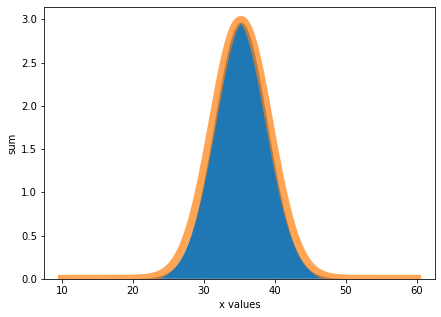

In [93]:
plt.rcParams["figure.figsize"] = (7,5)
fig, ax = plt.subplots(1, 1, sharex = True, sharey = True)
ax.stairs(av,np.linspace(10,60,2000),fill = True)
#ax.set_xlim(10,60)
ax.set_xlabel("x values")
ax.set_ylabel("sum")

ax.plot(np.linspace(10,60,2000),30 * stats.norm.pdf(np.linspace(10,60,2000),35.2, scale = 4),linewidth = 8,alpha = 0.7)
#ax.set_yscale("log")
plt.show()

on the log y scale:

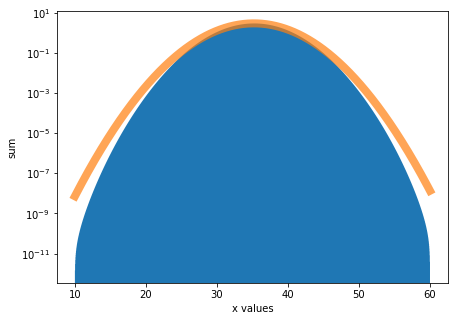

In [94]:
plt.rcParams["figure.figsize"] = (7,5)
fig, ax = plt.subplots(1, 1, sharex = True, sharey = True)
ax.stairs(av,np.linspace(10,60,2000),fill = True)
#ax.set_xlim(10,60)
ax.set_xlabel("x values")
ax.set_ylabel("sum")

ax.plot(np.linspace(10,60,2000),30 * stats.norm.pdf(np.linspace(10,60,2000),35.2, scale = 4),linewidth = 8,alpha = 0.7)
ax.set_yscale("log")
plt.show()

the graph for average of gaussian functions for both the log y value and y value match the gaussian distribution given by 40 * stats.norm.pdf(np.linspace(10,60,2000),35.2, scale = 4) thus the average is a gaussian function

Standard deviation of v_1 (stats.norm.pdf(np.linspace(10,60,1000),loc = 35.5, scale = 5))

In [95]:


np.std(v_1)


0.026982418217693583

Standard deviation of v_2   (stats.norm.pdf(np.linspace(0,9,1000),loc = 4.5, scale = 1))

In [97]:
np.std(v_2)

0.1378103254729395

Standard deviation of the sum

In [86]:
s = np.convolve(v_1, v_2)
np.std(s)

1.8485266474778923

In [ ]:
Standard deviation of the average

In [98]:
av = np.convolve(v_1, v_2)/2
np.std(av)

0.9242633237389462

The standard deviation of the sum and average increase the standard deviation for the sum increases more than the average

Explore what this means for integrating a signal over time.

each time you take a reading you convolute the gaussian
